# Model Development 

### Practice Lab to look at Laptop Pricing

Objectives:
* Use Linear Regression in one variable to fit the parameters to a model
* Use Linear Regression in multiple variables to fit the parameters to a model
* Use Polynomial Regression in single variable tofit the parameters to a model
* Create a pipeline for performing linear regression using multiple features in polynomial scaling
* Evaluate the performance of different forms of regression on basis of MSE and R^2 parameters

In [14]:
#import piplite
#await piplite.install('seaborn')

In [16]:
!conda install scikit-learn seaborn -y

Retrieving notices: done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\31415\miniconda3

  added / updated specs:
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.2.25  |       haa95532_0         130 KB
    certifi-2025.6.15          |  py312haa95532_0         157 KB
    joblib-1.4.2               |  py312haa95532_0         515 KB
    matplotlib-base-3.10.0     |  py312he19b0ae_0         9.4 MB
    openssl-3.0.16             |       h3f729d1_0         7.8 MB
    scikit-learn-1.6.1         |  py312h585ebfc_0         9.5 MB
    seaborn-0.13.2             |  py312haa95532_3         715 KB
    threadpoolctl-3.5.0        |  py312hfc267ef_0          49 KB
    ------------------------------------------------------------
                                   



==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [38]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [40]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [42]:
print(df.columns)

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')


### Task 1 : Single Linear Regression

Creating a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction

In [44]:
lm = LinearRegression()

In [46]:
X = df[['CPU_frequency']]
Y = df['Price']

In [48]:
lm.fit(X,Y)

Yhat=lm.predict(X)

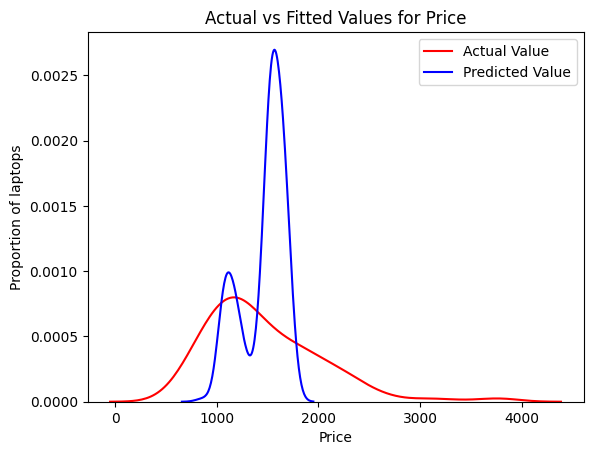

In [50]:
ax1 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

In [52]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.1344436321024326
The mean square error of price and predicted value is:  284583.4405868629


### Task 2 - Multiple Linear Regression

The parameters have a low enough p-value so as to indicate strong relationship with the 'Price' value are 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. Using all these variables to create a Multiple Linear Regression system

In [66]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z,Y)
Y_hat = lm1.predict(Z)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

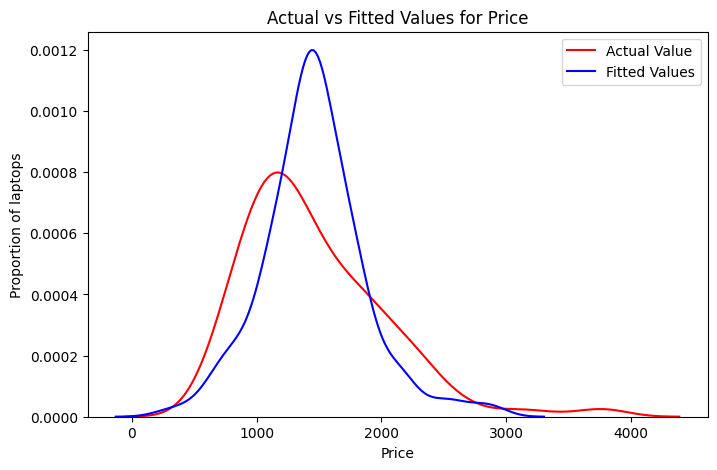

In [74]:
plt.figure(figsize=(8, 5))  # optional: set figure size

# Plot actual and predicted values
ax1 = sns.kdeplot(df['Price'], color="r", label="Actual Value")
sns.kdeplot(Y_hat, color="b", label="Fitted Values", ax=ax1)

# Customize plot
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend()
plt.show()

In [76]:
ax2 = sns.distplot(df['Price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax2)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

Text(0, 0.5, 'Proportion of laptops')

In [78]:
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
# Calculate R^2 and MSE
r2 = r2_score(Y, Y_hat)
mse = mean_squared_error(Y, Y_hat)

print(f"R^2 score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

R^2 score: 0.5083
Mean Squared Error (MSE): 161680.57


##### Comparing single linear regression and multiple linear regression
From this rule:
* Higher R² is better. It means your model explains more of the variance in the data.
* Lower MSE is better. It means your predictions are closer to the actual values on average.

Answer: The multiple linear regression model is clearly better.
It explains more of the variance (50.8% vs 13.4%) and has a much lower error (161,680 vs 284,583).

### Task 3 - Polynomial Regression

Using the variable "CPU_frequency" to create Polynomial features. 

In [111]:
print(type(X))

<class 'numpy.ndarray'>


In [113]:
X = X.flatten()
f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

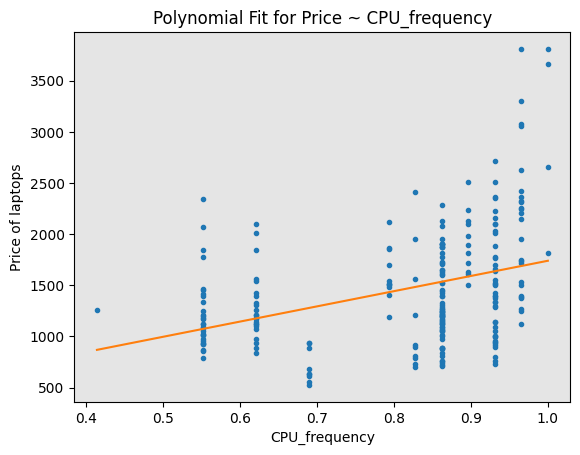

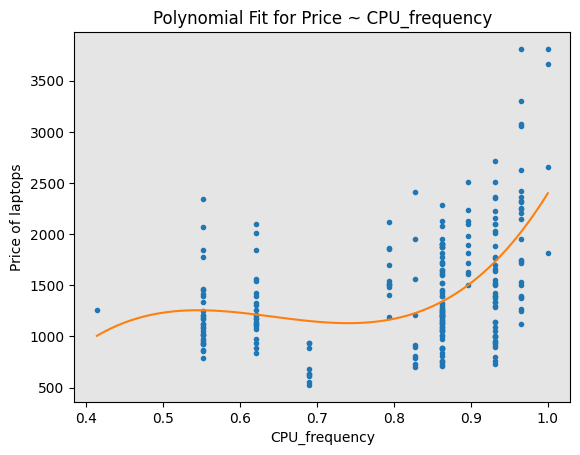

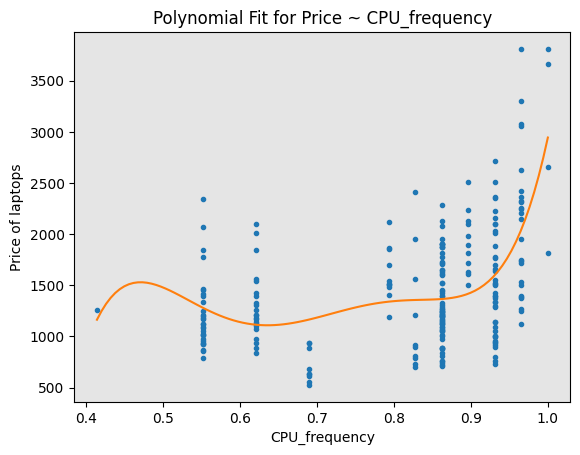

In [115]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    plt.figure()  # create new figure for each plot
    
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

# call plots
PlotPolly(p1, X, Y, 'CPU_frequency')
PlotPolly(p3, X, Y, 'CPU_frequency')
PlotPolly(p5, X, Y, 'CPU_frequency')

plt.show()  # show all plots

In [117]:
r_squared_1 = r2_score(Y, p1(X))
print('The R-square value for 1st degree polynomial is: ', r_squared_1)
print('The MSE value for 1st degree polynomial is: ', mean_squared_error(Y,p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('The R-square value for 3rd degree polynomial is: ', r_squared_3)
print('The MSE value for 3rd degree polynomial is: ', mean_squared_error(Y,p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('The R-square value for 5th degree polynomial is: ', r_squared_5)
print('The MSE value for 5th degree polynomial is: ', mean_squared_error(Y,p5(X)))

The R-square value for 1st degree polynomial is:  0.1344436321024326
The MSE value for 1st degree polynomial is:  284583.4405868629
The R-square value for 3rd degree polynomial is:  0.26692640796531064
The MSE value for 3rd degree polynomial is:  241024.86303848785
The R-square value for 5th degree polynomial is:  0.3030822706442341
The MSE value for 5th degree polynomial is:  229137.29548058633


### Task 4 - Pipeline

Creating a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression.

In [121]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)

In [123]:
print('MSE for multi-variable polynomial pipeline is: ', mean_squared_error(Y, ypipe))
print('R^2 for multi-variable polynomial pipeline is: ', r2_score(Y, ypipe))

MSE for multi-variable polynomial pipeline is:  120595.86128028373
R^2 for multi-variable polynomial pipeline is:  0.6332094535859658


With this we can see that the values of R^2 increase as we go from Single Linear Regression to Multiple Linear Regression. Further, if we go for multiple linear regression extended with polynomial features, we get an even better R^2 value.